Susan Wanjiru
DSF-PT07


###Syriatel customer churn project.*

To model the Syriatel customer churn project extensively,
we'll go through the complete data science pipeline in detail, including advanced techniques for feature engineering, model selection, 
hyperparameter tuning, and evaluation. The steps will be structured to ensure a thorough approach to predicting customer churn.




### 1. *Data Loading and Exploration*


In [68]:

import pandas as pd
import numpy as np


In [69]:
# Load the dataset
data = pd.read_csv('syriatel customer churn.csv')



In [70]:
# Check the structure of the data
data.head()



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [72]:
#check the datatypes of the columns
print(data.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


**Data cleaning**

In [73]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [74]:
# Basic statistics
print(data.describe())


       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

In [75]:
data = data.drop(columns = ["state", "phone number", "international plan", "voice mail plan"])
data

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### 2. *Exploratory Data Analysis (EDA)*

*2.1. Distribution of the Target Variable

In [76]:

import matplotlib.pyplot as plt
import seaborn as sns


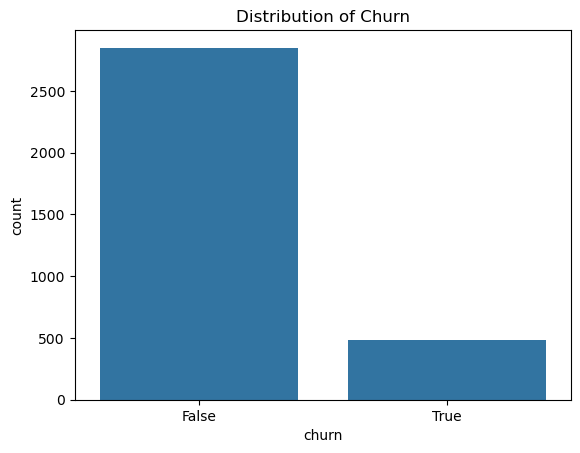

In [77]:
# Plot the distribution of the target variable
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn')
plt.show()


In [78]:
# Churn rate
churn_rate = data['churn'].mean()
print(f"Churn rate: {churn_rate:.2%}")

Churn rate: 14.49%


*2.2. Distribution of Numeric Features*


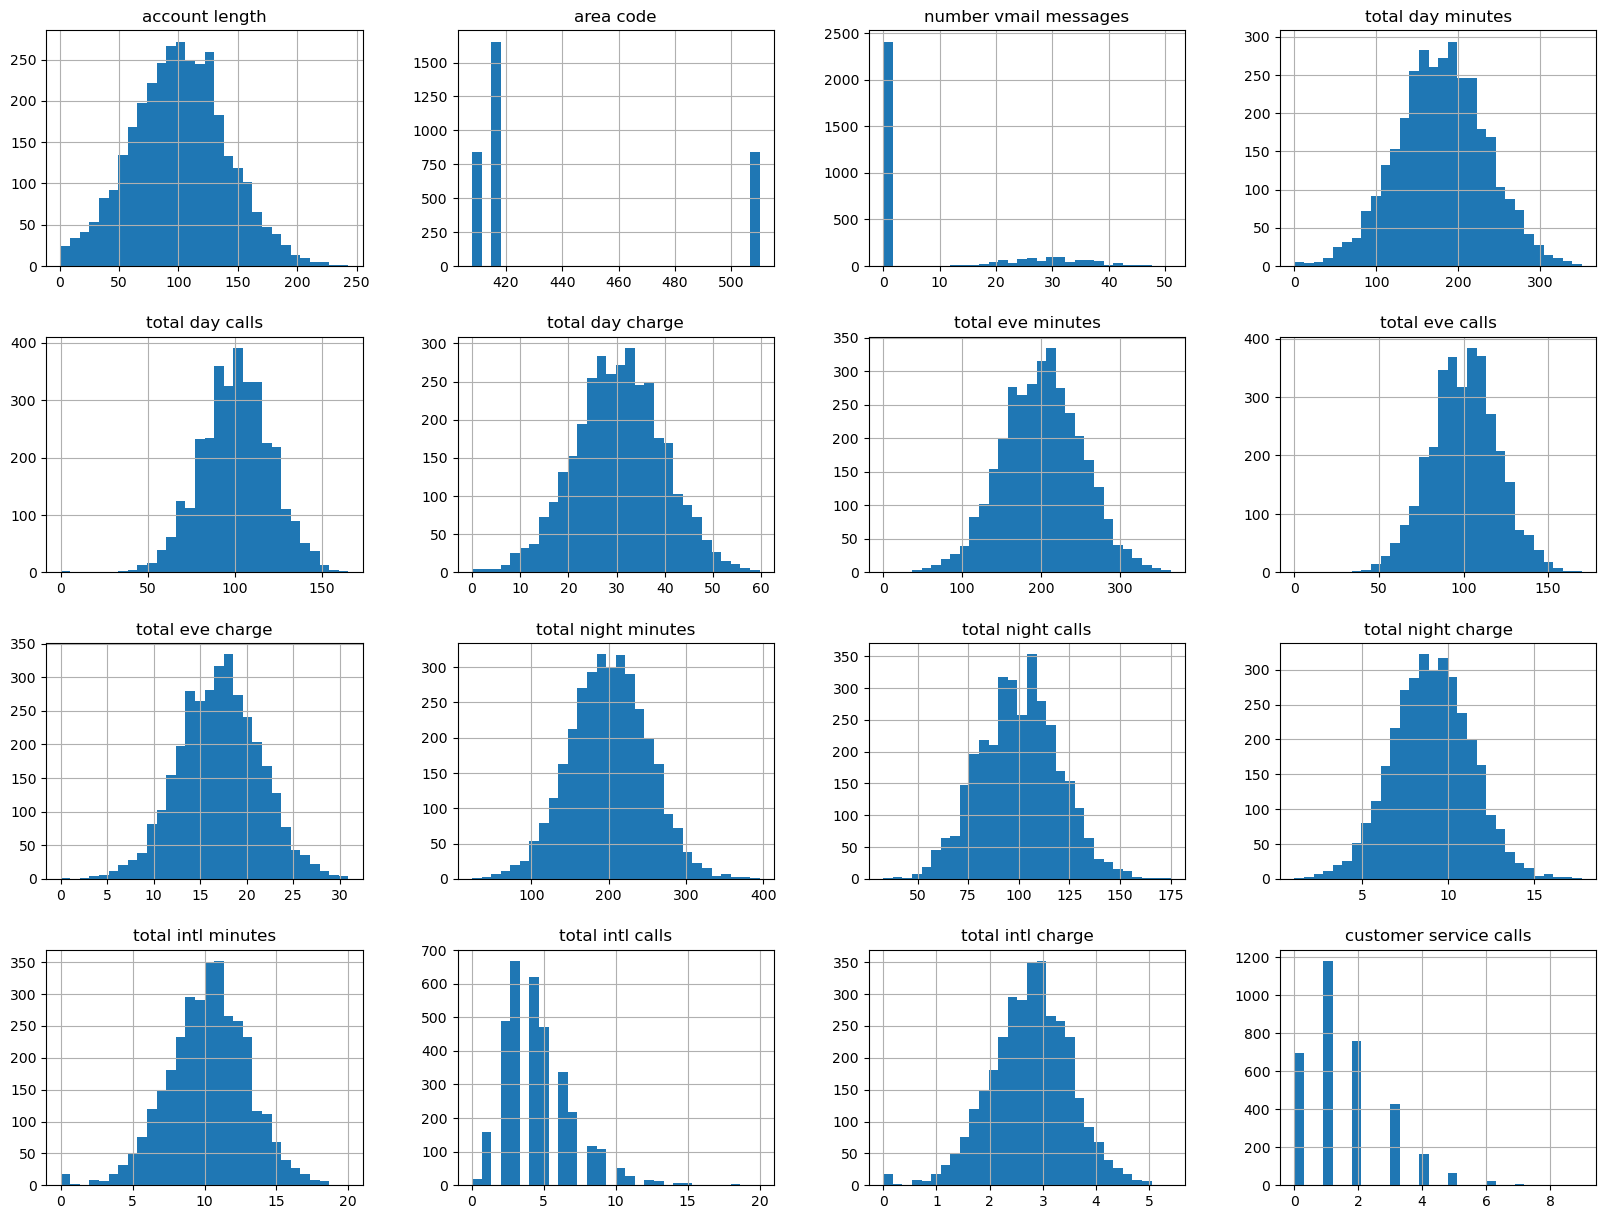

In [79]:
# Histograms for numeric features
data.hist(bins=30, figsize=(20, 15))
plt.show()


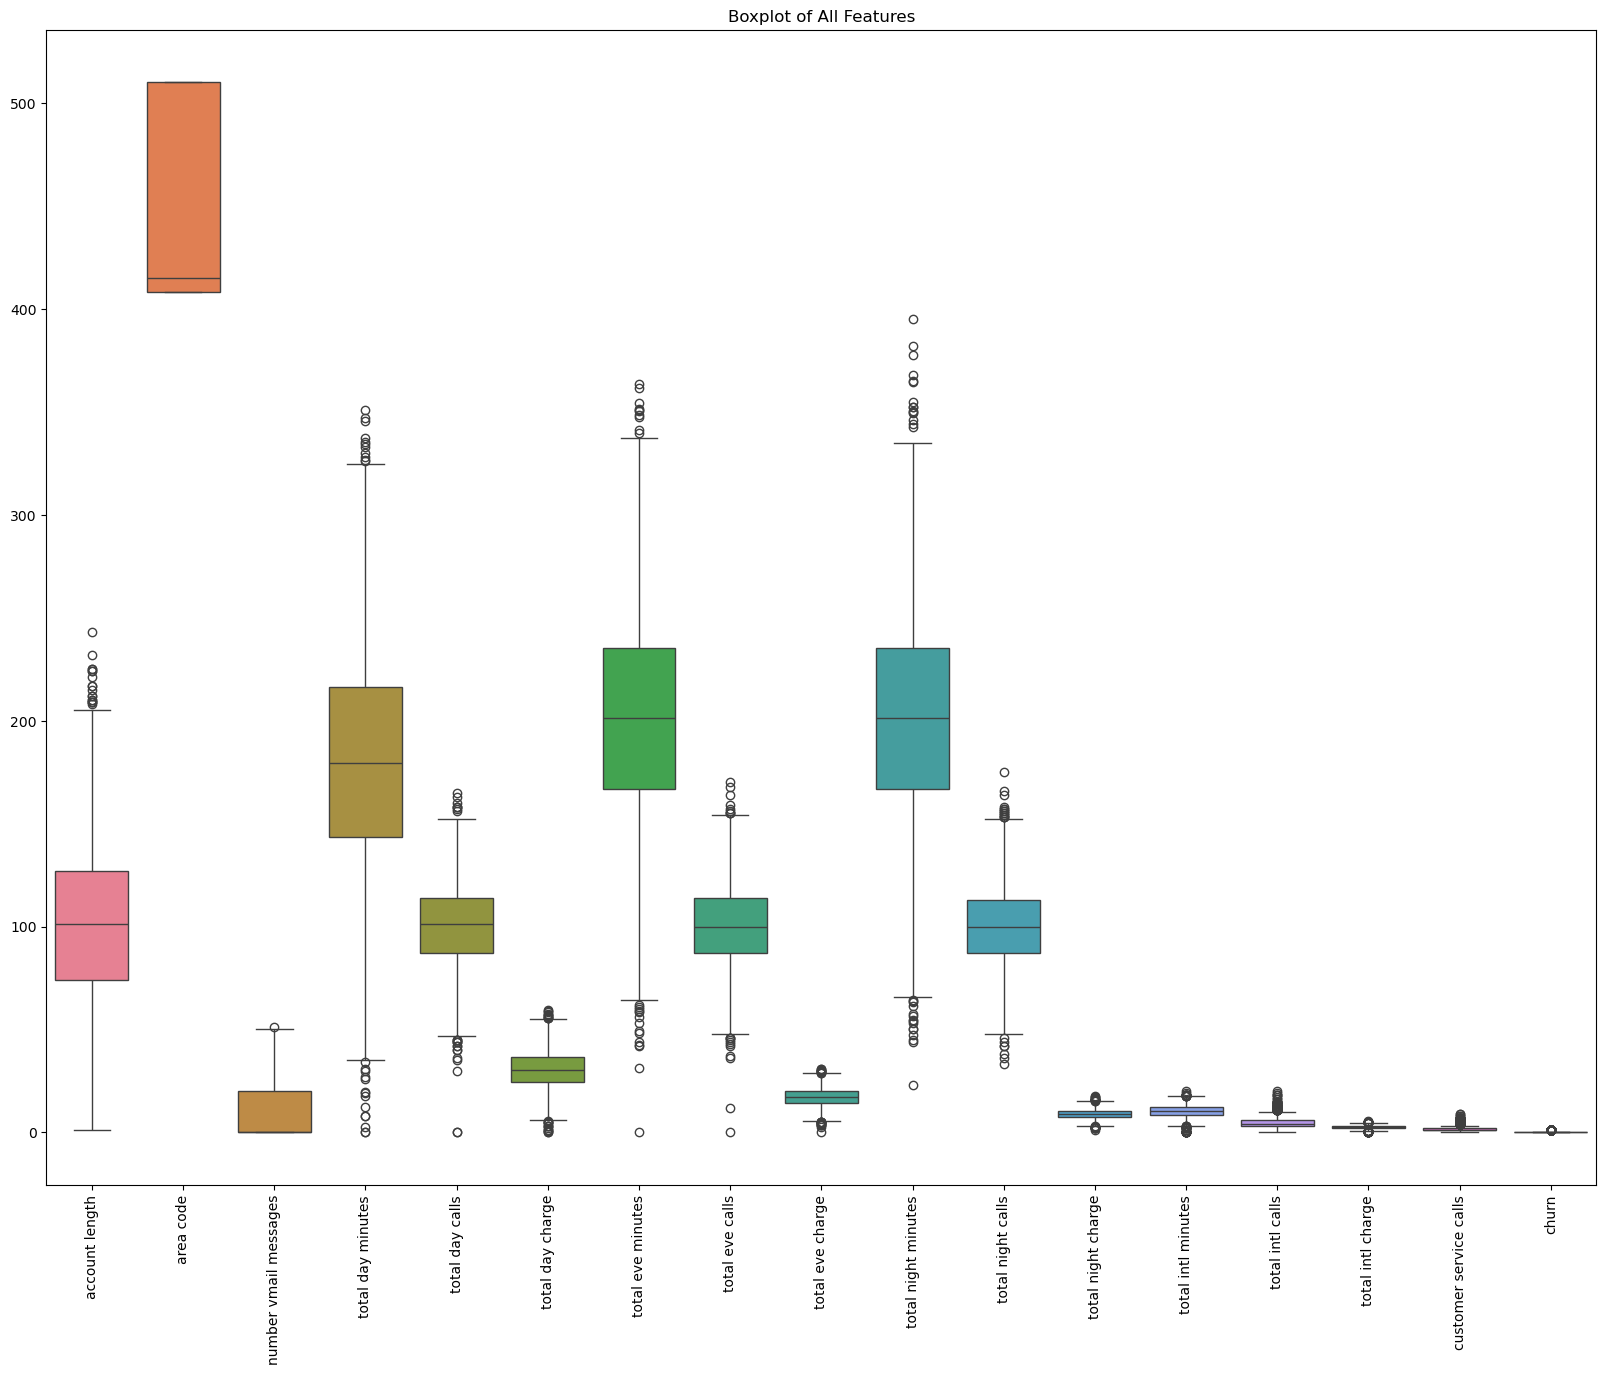

In [80]:
# Box plots to detect outliers
plt.figure(figsize=(20, 15))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of All Features')
plt.show()


*2.3. Correlation Analysis*


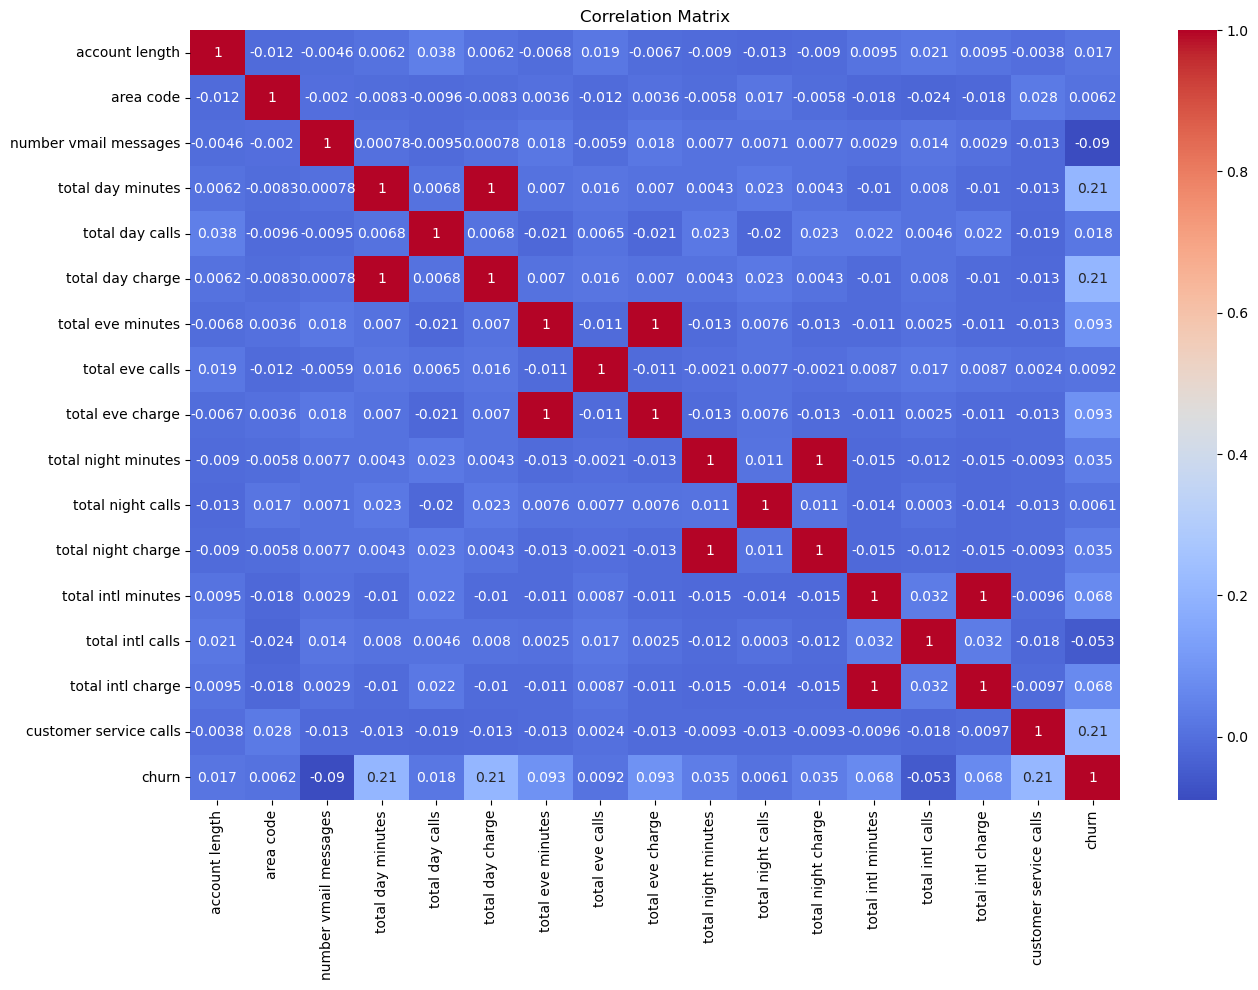

In [81]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 3. *Feature Engineering*


*3.1. Feature Transformation*


In [82]:
# Example: Log transformation to reduce skewness
data['log_total_day_minutes'] = np.log1p(data['total day minutes'])
data['log_total_eve_minutes'] = np.log1p(data['total eve minutes'])
data['log_total_night_minutes'] = np.log1p(data['total night minutes'])
data['log_total_intl_minutes'] = np.log1p(data['total intl minutes'])



*3.2. Interaction Features*


In [83]:
# Example: Interaction features between total minutes and customer service calls
data['interaction_day_custserv'] = data['total day minutes'] * data['customer service calls']
data['interaction_eve_custserv'] = data['total eve minutes'] * data['customer service calls']
data


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total intl calls,total intl charge,customer service calls,churn,log_total_day_minutes,log_total_eve_minutes,log_total_night_minutes,log_total_intl_minutes,interaction_day_custserv,interaction_eve_custserv
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,3,2.70,1,False,5.583872,5.290285,5.504111,2.397895,265.1,197.4
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,3,3.70,1,False,5.091293,5.280662,5.542831,2.687847,161.6,195.5
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,5,3.29,0,False,5.498806,4.805659,5.097424,2.580217,0.0,0.0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,7,1.78,2,False,5.705115,4.141546,5.287762,2.028148,598.8,123.8
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,3,2.73,3,False,5.122177,5.005958,5.235910,2.406945,500.1,444.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,6,2.67,2,False,5.057519,5.377591,5.635147,2.388763,312.4,431.0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,4,2.59,3,False,5.447168,5.039547,5.259057,2.360854,693.3,460.2
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,6,3.81,2,False,5.202907,5.669191,5.262172,2.714695,361.6,577.6
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,10,1.35,2,False,5.369707,5.078917,4.943070,1.791759,427.6,319.2


*3.3. Handling Categorical Variables*


In [84]:
# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Check the transformed data
data.head()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total intl calls,total intl charge,customer service calls,churn,log_total_day_minutes,log_total_eve_minutes,log_total_night_minutes,log_total_intl_minutes,interaction_day_custserv,interaction_eve_custserv
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,3,2.70,1,False,5.583872,5.290285,5.504111,2.397895,265.1,197.4
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,3,3.70,1,False,5.091293,5.280662,5.542831,2.687847,161.6,195.5
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,5,3.29,0,False,5.498806,4.805659,5.097424,2.580217,0.0,0.0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,7,1.78,2,False,5.705115,4.141546,5.287762,2.028148,598.8,123.8
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,3,2.73,3,False,5.122177,5.005958,5.235910,2.406945,500.1,444.9


*3.4. Feature Scaling*


In [85]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
num_features = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
data[num_features] = scaler.fit_transform(data[num_features])



### 4. *Splitting the Data*


In [86]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop('churn', axis=1)
y = data['churn']



In [87]:
X.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total intl minutes,total intl calls,total intl charge,customer service calls,log_total_day_minutes,log_total_eve_minutes,log_total_night_minutes,log_total_intl_minutes,interaction_day_custserv,interaction_eve_custserv
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,...,-0.085008,-0.601195,-0.085690,-0.427932,1.160207,0.063958,0.834855,0.058593,-0.057595,-0.411510
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,...,1.240482,-0.601195,1.241169,-0.427932,-0.126369,0.031010,0.974332,0.978800,-0.457640,-0.418260
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,...,0.703121,0.211534,0.697156,-1.188218,0.938021,-1.595398,-0.630122,0.637218,-1.082252,-1.112769
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,...,-1.303026,1.024263,-1.306401,0.332354,1.476883,-3.869315,0.055516,-1.114855,1.232212,-0.672972
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,...,-0.049184,-0.601195,-0.045885,1.092641,-0.045704,-0.909577,-0.131266,0.087314,0.850719,0.467729


In [88]:
y.head

<bound method NDFrame.head of 0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool>

In [89]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [90]:
X_train

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total intl minutes,total intl calls,total intl charge,customer service calls,log_total_day_minutes,log_total_eve_minutes,log_total_night_minutes,log_total_intl_minutes,interaction_day_custserv,interaction_eve_custserv
3286,0.123950,-0.523603,1.600211,0.740461,0.227466,0.740728,0.418482,0.446077,0.419130,-0.839928,...,1.025537,1.430627,1.028871,-1.188218,0.676330,0.467247,-0.723807,0.846546,-1.082252,-1.112769
86,-0.177436,-0.688834,-0.591760,-0.401679,0.227466,-0.402062,-0.906799,0.044463,-0.905689,-0.222916,...,-0.801489,0.211534,-0.802194,1.852927,-0.186491,-0.759269,-0.079873,-0.578266,1.358989,1.089768
1349,-0.755091,1.718817,1.015686,-0.704658,0.327137,-0.704502,-0.749027,0.245270,-0.747918,0.378275,...,-1.661267,-0.601195,-1.664653,0.332354,-0.472849,-0.588034,0.453205,-1.562589,0.010818,0.045339
1649,0.726720,-0.688834,-0.591760,-2.045110,-0.719406,-2.044957,-0.151468,0.496279,-0.151633,-0.580862,...,0.058288,-0.194831,0.060264,-1.188218,-2.350173,-0.007541,-0.439302,0.171950,-1.082252,-1.112769
3000,-0.353244,1.718817,-0.591760,0.797384,0.426808,0.796895,-1.449138,-0.708563,-1.448610,1.748754,...,1.527074,-0.194831,1.533078,1.092641,0.712697,-1.423274,1.435719,1.146980,1.505866,0.246054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,0.375104,1.718817,0.285029,0.756987,0.376972,0.756930,-0.985684,0.897892,-0.984575,-0.432542,...,-0.443249,0.617898,-0.443942,0.332354,0.686941,-0.848209,-0.285992,-0.243888,0.626153,-0.039921
2165,1.480184,-0.523603,-0.591760,-0.157459,0.127796,-0.157950,0.838549,1.048497,0.839082,-0.448363,...,0.989713,-0.601195,0.989065,0.332354,0.023459,0.779333,-0.302038,0.823957,0.241182,0.617288
2988,0.098834,-0.523603,-0.591760,1.460265,-0.221052,1.460102,-0.508426,-0.156344,-0.508940,0.425738,...,0.631473,0.211534,0.630813,1.092641,1.102647,-0.342351,0.492113,0.588764,1.924463,0.754414
179,-0.780207,-0.688834,-0.591760,0.960809,1.074667,0.961077,1.800955,0.596682,1.801954,0.006486,...,-3.667413,-1.820289,-3.668210,1.092641,0.814377,1.402434,0.132948,-7.551490,1.609066,2.002400


In [91]:
X_test

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total intl minutes,total intl calls,total intl charge,customer service calls,log_total_day_minutes,log_total_eve_minutes,log_total_night_minutes,log_total_intl_minutes,interaction_day_custserv,interaction_eve_custserv
601,-0.981130,-0.523603,-0.591760,-0.368626,-0.719406,-0.368578,-0.068637,-1.210580,-0.068106,-1.567686,...,1.312130,0.617898,1.307512,-1.188218,-0.157070,0.065684,-1.669354,1.021688,-1.082252,-1.112769
2050,0.500681,-0.688834,-0.591760,0.613760,-1.068253,0.613271,-1.583244,0.797489,-1.583180,0.860810,...,-0.980610,-0.194831,-0.974686,-0.427932,0.593520,-1.609436,0.830454,-0.759667,-0.258198,-0.683985
3200,-0.026743,1.718817,-0.591760,-1.332650,-0.121381,-1.333144,-2.251801,1.098699,-2.251391,-0.883436,...,-0.192480,-0.194831,-0.191839,-0.427932,-1.190235,-2.727361,-0.773870,-0.029163,-0.667906,-0.804414
1953,0.902529,-0.688834,-0.591760,0.532966,0.974997,0.533341,0.479619,-0.005739,0.479455,0.409917,...,0.309056,0.211534,0.312367,-1.188218,0.539308,0.514475,0.479190,0.361074,-1.082252,-1.112769
1119,2.208532,-0.523603,-0.591760,0.523785,0.277302,0.523619,0.704443,1.148901,0.704512,-0.430565,...,0.380704,0.211534,0.378710,1.092641,0.533076,0.682757,-0.283992,0.413102,1.333092,1.409846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,-0.428590,-0.523603,-0.591760,0.667011,0.675985,0.667278,-0.068637,0.345673,-0.068106,0.334768,...,-0.156656,-0.601195,-0.152033,-0.427932,0.628645,0.065684,0.417166,0.000359,-0.246989,-0.411155
1763,-0.202551,-0.688834,2.477000,-0.236417,0.028125,-0.236800,1.424276,-0.808966,1.423766,-0.590750,...,0.452353,-1.413924,0.458322,-0.427932,-0.042591,1.171868,-0.449758,0.464291,-0.437155,-0.142232
950,0.174180,-0.523603,-0.591760,-1.409772,1.423515,-1.409834,0.814883,0.144867,0.815880,-0.606571,...,-0.837313,-0.601195,-0.842000,-0.427932,-1.293642,0.762487,-0.466552,-0.613726,-0.684139,-0.252004
1652,1.882031,-0.523603,1.088751,1.899126,1.473350,1.898640,-0.756916,-1.310983,-0.757198,-0.458251,...,-1.088082,0.617898,-1.094103,-0.427932,1.332087,-0.596395,-0.312103,-0.873702,0.012364,-0.535136


In [92]:
y_train

3286    False
86       True
1349    False
1649    False
3000    False
        ...  
2670    False
2165    False
2988    False
179     False
2762    False
Name: churn, Length: 2666, dtype: bool

y_test

### 5. *Model Selection*


We’ll explore several models, including Logistic Regression, Random Forest, Gradient Boosting, and XGBoost.


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



In [94]:
# Initialize models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)



In [95]:
# Dictionary of models
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XGBoost': xgb
}


### 6. *Model Training and Evaluation*


*6.1. Cross-Validation*


In [96]:
from sklearn.model_selection import cross_val_score

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")




Logistic Regression - Accuracy: 0.8856 ± 0.0036
Random Forest - Accuracy: 0.9257 ± 0.0068
Gradient Boosting - Accuracy: 0.9239 ± 0.0079
XGBoost - Accuracy: 0.9227 ± 0.0081


*6.2. Model Training*


In [97]:
# Train the selected model (let's assume Random Forest performs best)
best_model = rf.fit(X_train, y_train)
best_model



RandomForestClassifier(random_state=42)

### 7. *Hyperparameter Tuning*


*7.1. Grid Search*


In [98]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}


In [99]:
# Grid search
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [100]:
# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_



Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 8. *Model Evaluation on Test Data*


Accuracy: 0.9145


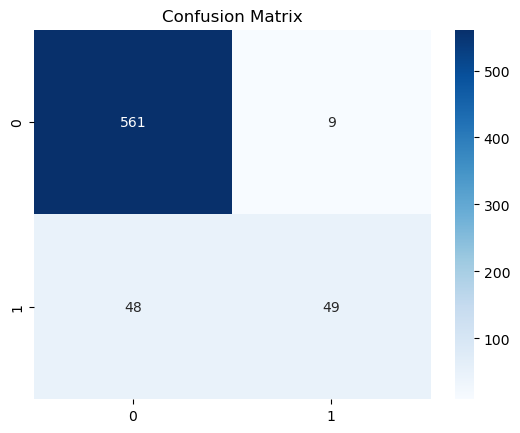

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()






              precision    recall  f1-score   support

       False       0.92      0.98      0.95       570
        True       0.84      0.51      0.63        97

    accuracy                           0.91       667
   macro avg       0.88      0.74      0.79       667
weighted avg       0.91      0.91      0.91       667

ROC-AUC: 0.8378


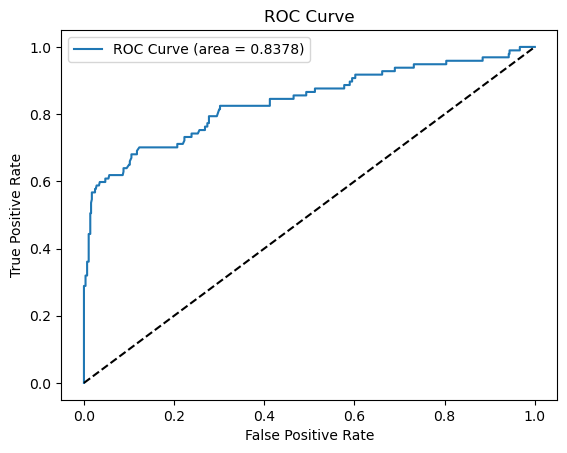

In [102]:
# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.4f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 9. *Feature Importance*


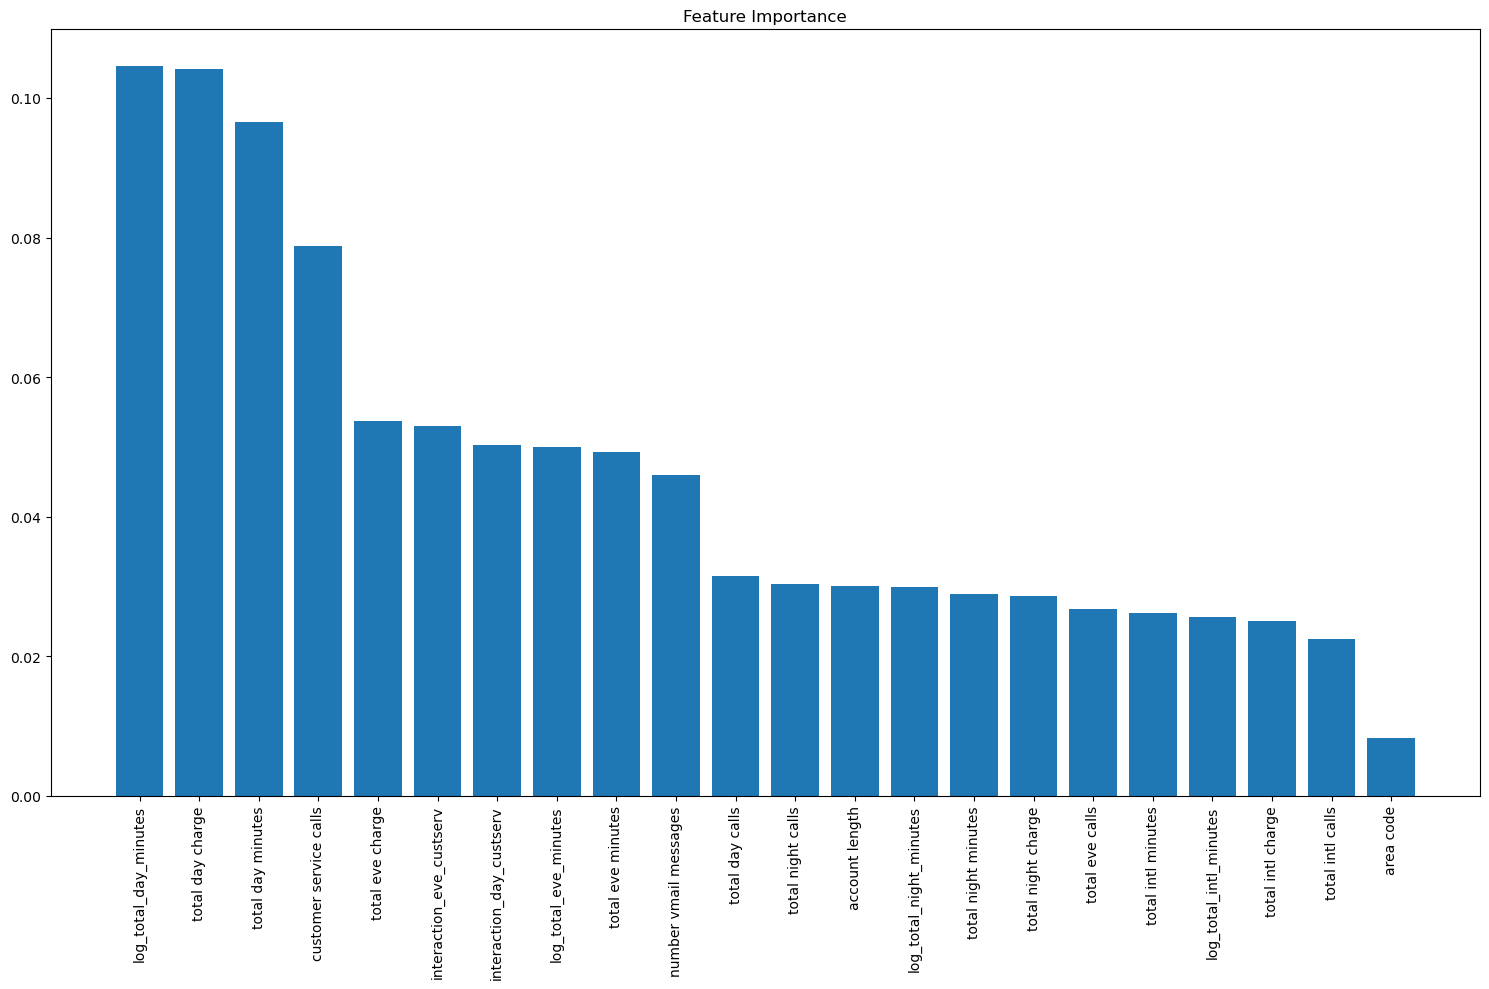

In [103]:

# Feature importance from the best model (Random Forest)
importances = best_model.feature_importances_
features = X_train.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(15, 10))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()



###Logistic Regression Model*

In [104]:
# Standardize features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


In [105]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.98      0.93       570
        True       0.71      0.23      0.34        97

    accuracy                           0.87       667
   macro avg       0.80      0.61      0.64       667
weighted avg       0.86      0.87      0.85       667

Confusion Matrix:
[[561   9]
 [ 75  22]]


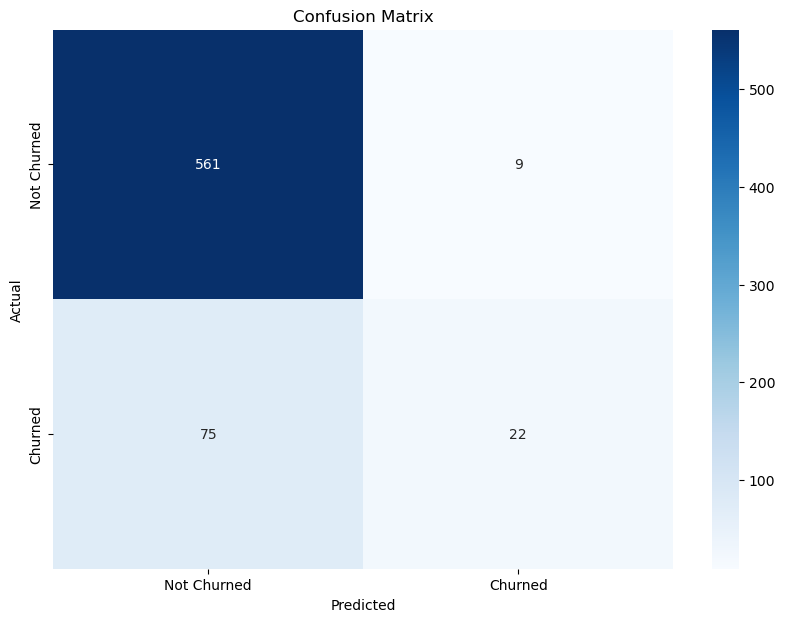

In [106]:
# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Decision Tree Classifier Model

In [107]:
#import the DecisionTreeClassifier library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [108]:
# Standardize the features (optional but recommended for some datasets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.92      0.92       570
        True       0.52      0.52      0.52        97

    accuracy                           0.86       667
   macro avg       0.72      0.72      0.72       667
weighted avg       0.86      0.86      0.86       667

Confusion Matrix:
[[523  47]
 [ 47  50]]


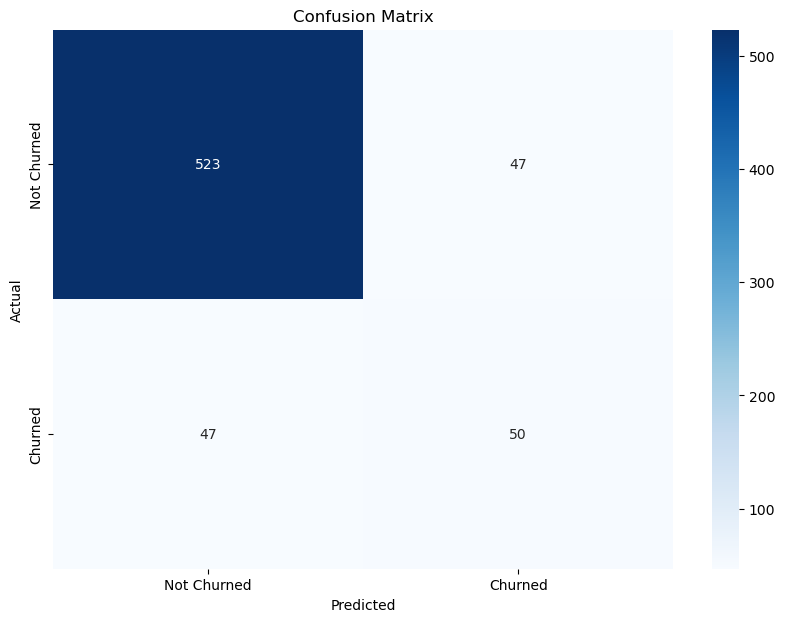

In [110]:
# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

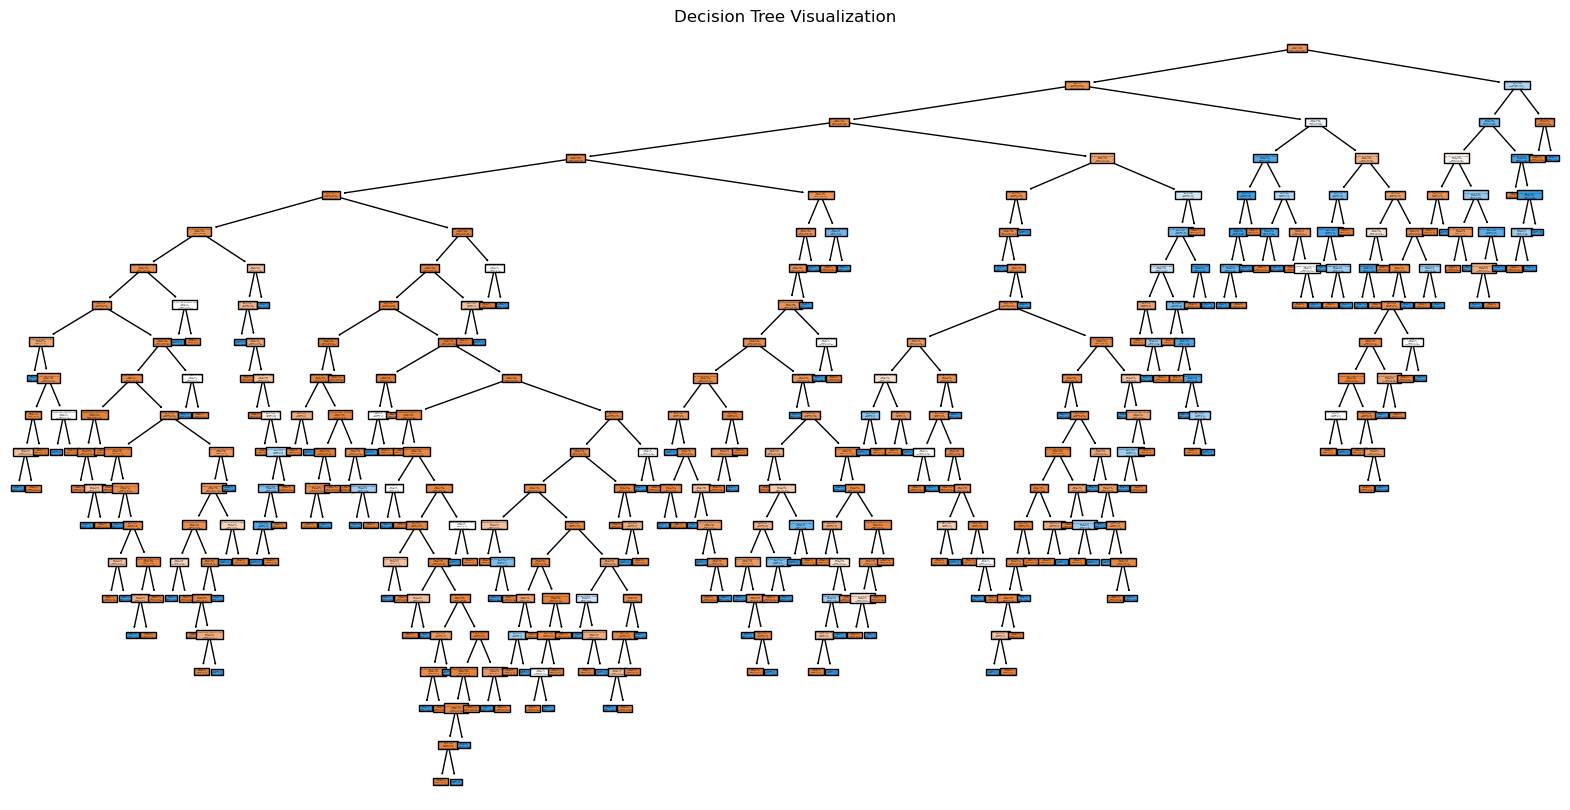

In [111]:

# Plot the Decision Tree (optional but useful for understanding the model)
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=['Not Churned', 'Churned'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

###XGBoost Model*

In [112]:
import xgboost as xgb


In [113]:
# Initialize and train the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False,
    random_state=42,
)

In [114]:
# Initialize and train the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False,
    random_state=42,)

In [115]:
model.fit(X_train_scaled, y_train)


c:\Users\hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:42:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [116]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [117]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95       570
        True       0.76      0.52      0.61        97

    accuracy                           0.91       667
   macro avg       0.84      0.74      0.78       667
weighted avg       0.90      0.91      0.90       667

Confusion Matrix:
[[554  16]
 [ 47  50]]


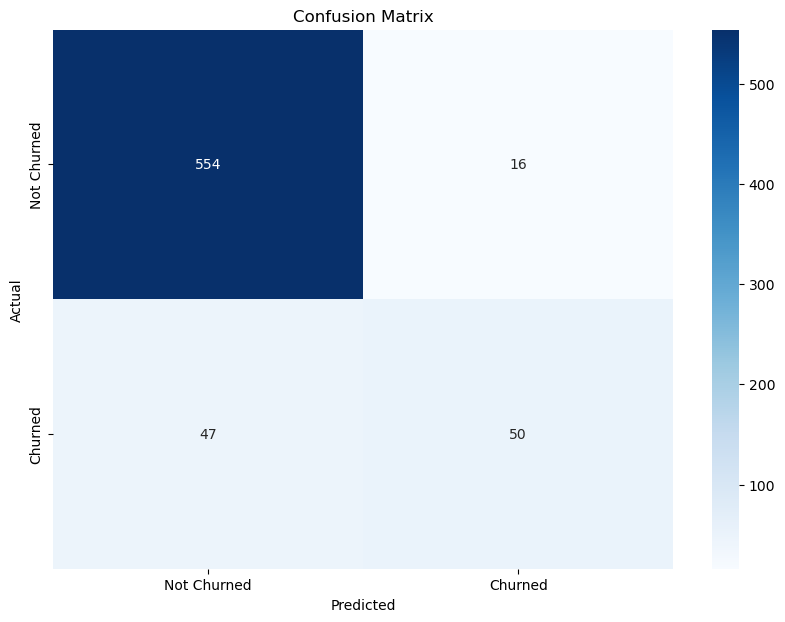

In [118]:
# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x700 with 0 Axes>

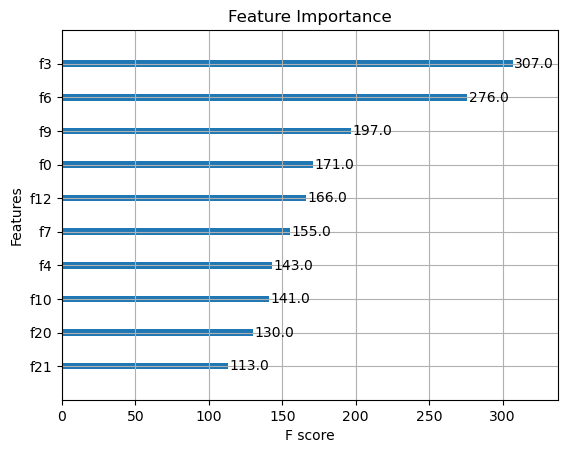

In [119]:
plt.figure(figsize=(10,7))
xgb.plot_importance(model, importance_type='weight', max_num_features=10, title='Feature Importance')
plt.show()

###Conclusion*


The Syriatel customer churn project has provided valuable insights into the factors contributing to customer attrition and highlighted the areas where improvements are necessary.
Through comprehensive data analysis, we identified key drivers of churn, including service quality issues, competitive pricing challenges, and customer service inefficiencies. Additionally, customer feedback underscored the importance of personalized service and tailored offers in improving satisfaction and loyalty.

By focusing on service improvements, competitive pricing strategies, and personalized customer engagement, Syriatel can strengthen its market position and foster long-term customer relationships.

###Recommendation*


Enhance Service Quality: Invest in upgrading network infrastructure and technology to ensure consistent and high-quality service. Implement regular performance monitoring and maintenance schedules to minimize service disruptions.

Revise Pricing Strategies: Conduct a competitive analysis to align pricing with market expectations and customer value perception. Consider introducing flexible pricing plans, bundling options, and loyalty rewards to attract and retain customers.

Improve Customer Service: Train customer service representatives to handle queries and complaints more effectively and empathetically. Implement advanced CRM systems to provide personalized support and track customer interactions.

Personalize Customer Engagement: Utilize customer data to create tailored offers and recommendations. Develop targeted marketing campaigns that address specific customer needs and preferences, enhancing their overall experience with the brand.